In [96]:
#Dependencies

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import json
import time

from weather_api import api_key

from citipy import citipy

In [97]:
#Import data
data = "../output_data/cities.csv"
cities = pd.read_csv(data)
cities = cities.set_index("City")

cities

,City_ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City,,,,,,,,,
ostrovnoy,0,2,RU,1558378754,72,68.05,39.51,37.50,7.16
mahebourg,1,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
qaanaaq,2,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
zhuhai,3,0,CN,1558378755,39,40.71,112.04,44.60,4.47
cape town,4,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...
yabrud,543,0,SY,1558378840,32,33.97,36.66,80.60,8.05
paraiso,544,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
veraval,545,0,FR,1558378898,62,49.65,0.71,61.00,8.05


## Generate Cities List

In [98]:
#Range Latitud/Longitude and create list to hold both of it. 

latitude = (-90, 90)
longitude =(-180, 180)
lat_lng = []

#Create list to hold cities.
cities = []

#Crete set of Latitude and Longitude with random.
lat = np.random.uniform(latitude[0], latitude[1], size = 1500)
lng = np.random.uniform(longitude[0], longitude[1], size=1500)

lat_lng = zip(lat, lng)

#Generate cities list.
for lat_lngs in lat_lng:
    city = citipy.nearest_city(lat_lngs[0], lat_lngs[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)

650

In [99]:
#Check cities list.
print(cities)

['charters towers', 'iracoubo', 'esperance', 'fort nelson', 'cidreira', 'cabo san lucas', 'new norfolk', 'leningradskiy', 'parabel', 'yinchuan', 'santa maria', 'jamestown', 'sentyabrskiy', 'nisia floresta', 'campbell river', 'huarmey', 'taolanaro', 'faanui', 'novouzensk', 'atuona', 'greenwood', 'abrau-dyurso', 'saleaula', 'provideniya', 'rikitea', 'rena', 'butaritari', 'mataura', 'tubruq', 'cape town', 'carbonia', 'albany', 'oeiras', 'dikson', 'chokurdakh', 'kavaratti', 'batamshinskiy', 'castro', 'cabimas', 'kondinskoye', 'mahebourg', 'busselton', 'shitkino', 'qaanaaq', 'saint george', 'kahului', 'port alfred', 'jiuquan', 'bathsheba', 'barentsburg', 'mys shmidta', 'aksu', 'georgetown', 'cayenne', 'krishnarajasagara', 'ushuaia', 'avarua', 'huilong', 'coquimbo', 'mount gambier', 'hurghada', 'hobart', 'yellowknife', 'bluff', 'cabadiangan', 'huanren', 'khomutovka', 'saint-philippe', 'balimo', 'laguna', 'puerto ayora', 'salalah', 'rio gallegos', 'klaksvik', 'vaini', 'kovylkino', 'punta aren

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [100]:
#Get weather data from Openweathermap and connect with api key to get access.

url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q="

In [101]:
#Use requests.get to get response from link and return to json.

weather_request = requests.get(query_url + city)
weather_json = weather_request.json()

weather_json

{'coord': {'lon': 39.7, 'lat': -5.3833},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 299.12,
  'feels_like': 299.12,
  'temp_min': 299.12,
  'temp_max': 299.12,
  'pressure': 1013,
  'humidity': 82,
  'sea_level': 1013,
  'grnd_level': 1009},
 'visibility': 10000,
 'wind': {'speed': 3.81, 'deg': 101, 'gust': 5.53},
 'clouds': {'all': 20},
 'dt': 1636045718,
 'sys': {'country': 'TZ', 'sunrise': 1635994520, 'sunset': 1636038849},
 'timezone': 10800,
 'id': 152877,
 'name': 'Mtambile',
 'cod': 200}

In [102]:
#Check that works by grabbing "name" out of the data to get city name.
city_return = weather_json["name"]
print(city_return)

Mtambile


In [103]:
#Create list to hold all the data columns.

country_name = []
cities_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
wind_speed = []
cloudiness = []
date = []
counter = 0

#Loop throgh the list of all cities and use "except" to skip errors.
print ("Begin!")
print ("----------------------------")

for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        cities_name.append(response["name"])
        country_name.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        city_return = response["name"]
        counter = counter + 1
        
        
        print (f"Retieving Results for {counter}| {city_return}")
        
    except:
        print("City not found! Next...")
        pass
print ("----------------------------")
print("Processing Complete")



Begin!
----------------------------
Retieving Results for 1| Charters Towers
Retieving Results for 2| Iracoubo
Retieving Results for 3| Esperance
Retieving Results for 4| Fort Nelson
Retieving Results for 5| Cidreira
Retieving Results for 6| Cabo San Lucas
Retieving Results for 7| New Norfolk
Retieving Results for 8| Leningradskiy
Retieving Results for 9| Parabel'
Retieving Results for 10| Yinchuan
Retieving Results for 11| Santa Maria
Retieving Results for 12| Jamestown
City not found! Next...
Retieving Results for 13| Nísia Floresta
Retieving Results for 14| Campbell River
Retieving Results for 15| Huarmey
City not found! Next...
Retieving Results for 16| Faanui
Retieving Results for 17| Novouzensk
Retieving Results for 18| Atuona
Retieving Results for 19| Greenwood
Retieving Results for 20| Abrau-Dyurso
City not found! Next...
Retieving Results for 21| Provideniya
Retieving Results for 22| Rikitea
Retieving Results for 23| Rena
Retieving Results for 24| Butaritari
Retieving Results 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [104]:
#Storing data and create DataFrame to display.

weather_store = {"Country": country_name, "City": cities_name, "Latitude": latitude, "Longitude": longitude,
                "Max Temperature": max_temp, "Humidity": humidity, "Wind Speed": wind_speed, "Cloudiness": cloudiness, 
                "Date":date}
weather_data = pd.DataFrame(weather_store)
weather_data.head()

,Country,City,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Date
0,AU,Charters Towers,-20.1000,146.2667,292.92,86,3.41,0,1636045724
1,GF,Iracoubo,5.4802,-53.2011,302.83,63,4.28,47,1636045729
2,AU,Esperance,-33.8667,121.9000,290.06,94,4.02,19,1636045729
3,CA,Fort Nelson,58.8053,-122.7002,273.81,81,1.02,97,1636045481
4,BR,Cidreira,-30.1811,-50.2056,295.74,83,4.45,32,1636045574


In [105]:
pd.DataFrame(weather_data.describe())

,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Date
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,19.122868,18.108221,288.494941,71.219015,3.571969,61.263158,1.636046e+09
std,33.489142,89.579498,13.138152,20.124981,2.511600,37.131734,1.702986e+02
min,-54.800000,-179.166700,247.430000,9.000000,0.000000,0.000000,1.636045e+09
25%,-8.433300,-60.145800,280.400000,61.000000,1.540000,23.000000,1.636046e+09
50%,21.450000,22.683300,291.420000,75.000000,3.100000,75.000000,1.636046e+09
75%,48.104800,98.200000,299.010000,87.000000,4.860000,98.000000,1.636046e+09
max,78.218600,179.316700,311.890000,100.000000,15.430000,100.000000,1.636046e+09


In [106]:
#Save data to CSV
weather_data.to_csv("../weather_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Max Temperature Plot

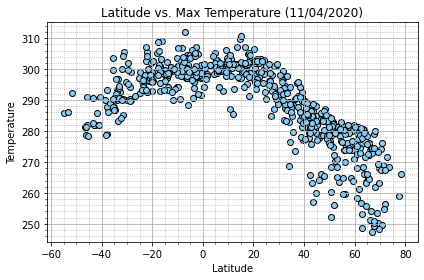

<Figure size 432x288 with 0 Axes>

In [107]:
#Generate Scatter Plot for Latitude vs. Max Temperature.

plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors ="lightskyblue",
            marker = "o", edgecolor = "black")

plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Max Temperature (11/04/2020)")
plt.minorticks_on()
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle=":")
plt.tight_layout()
plt.show()

plt.savefig("../data_images/Latitude_MaxTemperature.png")

## Latitude vs. Humidity Plot

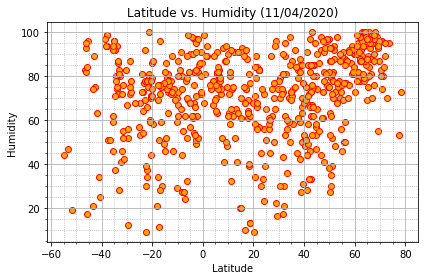

<Figure size 432x288 with 0 Axes>

In [108]:
#Generate Scatter Plot for Latitude vs. Humidity.

plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors ="orange",
            marker = "o", edgecolor = "red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity (11/04/2020)")
plt.minorticks_on()
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle=":")
plt.tight_layout()
plt.show()

plt.savefig("../data_images/Latitude_Humidity.png")

## Latitude vs. Cloudiness Plot

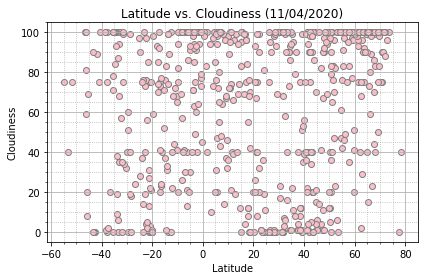

<Figure size 432x288 with 0 Axes>

In [109]:
#Generate Scatter Plot for Latitude vs. Cloudiness.

plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors ="pink",
            marker = "o", edgecolor = "grey")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness (11/04/2020)")
plt.minorticks_on()
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle=":")
plt.tight_layout()
plt.show()

plt.savefig("../data_images/Latitude_Cloudiness")

## Latitude vs. Wind Speed Plot

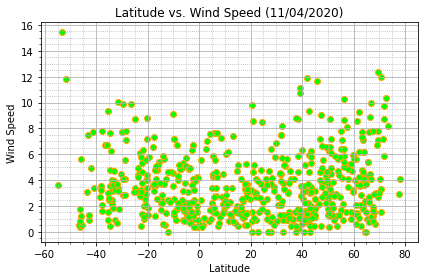

<Figure size 432x288 with 0 Axes>

In [110]:
#Generate Scatter Plot vs. Wind Speed.

plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors ="lime",
            marker = "o", edgecolor = "orange")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed (11/04/2020)")
plt.minorticks_on()
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle=":")
plt.tight_layout()
plt.show()

plt.savefig("../data_images/Latitude_vs_WindSpeed.png")

## Linear Regression

In [111]:
#Separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
#Southern Hemisphere (less than 0 degrees latitude):

southern = weather_data.drop(weather_data[weather_data["Latitude"]<0].index)
southern

,Country,City,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Date
1,GF,Iracoubo,5.4802,-53.2011,302.83,63,4.28,47,1636045729
3,CA,Fort Nelson,58.8053,-122.7002,273.81,81,1.02,97,1636045481
5,MX,Cabo San Lucas,22.8909,-109.9124,303.18,45,0.00,1,1636045502
7,RU,Leningradskiy,69.3833,178.4167,250.21,93,2.69,50,1636045731
8,RU,Parabel',58.6978,81.4825,264.91,86,5.24,100,1636045732
...,...,...,...,...,...,...,...,...,...
583,VE,San Felipe,10.3399,-68.7425,301.62,72,2.83,72,1636046191
584,NE,Arlit,18.7369,7.3853,304.72,13,0.54,0,1636046125
585,VE,Maracaibo,10.6317,-71.6406,304.63,58,2.09,95,1636046192
586,BS,Marsh Harbour,26.5412,-77.0636,298.88,60,2.54,95,1636046193


In [112]:
southern.describe()

,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Date
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,3.900000e+02
mean,39.224040,14.825279,284.659718,72.789744,3.523897,62.576923,1.636046e+09
std,20.107456,87.803429,13.961434,19.696982,2.561743,37.645389,1.703812e+02
min,0.516700,-179.166700,247.430000,9.000000,0.000000,0.000000,1.636045e+09
25%,22.085775,-67.659275,276.470000,62.000000,1.472500,23.000000,1.636046e+09
50%,41.415850,22.610350,284.215000,76.000000,2.995000,75.000000,1.636046e+09
75%,55.682775,85.446050,297.517500,88.000000,4.910000,99.000000,1.636046e+09
max,78.218600,179.316700,310.720000,100.000000,12.370000,100.000000,1.636046e+09


In [113]:
northern = weather_data.drop(weather_data[weather_data["Latitude"]>=0].index)
northern

,Country,City,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Date
0,AU,Charters Towers,-20.1000,146.2667,292.92,86,3.41,0,1636045724
2,AU,Esperance,-33.8667,121.9000,290.06,94,4.02,19,1636045729
4,BR,Cidreira,-30.1811,-50.2056,295.74,83,4.45,32,1636045574
6,AU,New Norfolk,-42.7826,147.0587,281.90,75,0.93,0,1636045506
10,BR,Santa Maria,-29.6842,-53.8069,301.96,52,2.82,0,1636045733
...,...,...,...,...,...,...,...,...,...
571,AR,La Rioja,-29.4111,-66.8507,295.16,56,9.91,51,1636046186
575,MU,Quatre Cocos,-20.2078,57.7625,295.98,71,4.36,0,1636046096
576,BR,Rio Grande,-32.0350,-52.0986,300.21,72,0.68,35,1636046021
578,PF,Tautira,-17.7333,-149.1500,298.16,76,6.55,70,1636046189


In [114]:
northern.describe()

,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Date
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,1.990000e+02
mean,-20.271390,24.542129,296.011206,68.140704,3.666181,58.688442,1.636046e+09
std,13.440275,92.850051,6.625608,20.643690,2.413862,36.058362,1.705559e+02
min,-54.800000,-175.200000,278.480000,9.000000,0.000000,0.000000,1.636046e+09
25%,-31.743750,-56.034850,292.080000,55.500000,1.820000,25.000000,1.636046e+09
50%,-20.100000,22.747400,297.060000,73.000000,3.320000,71.000000,1.636046e+09
75%,-8.153200,118.555200,300.200000,82.000000,4.840000,94.000000,1.636046e+09
max,-0.481900,174.500000,311.890000,100.000000,15.430000,100.000000,1.636046e+09


## Max Temperature and Latitude
* In Southern Hemisphere has a strong negative relationship as r-value = -0.85
* In Northern Hemisphere has a strong positive relationship as r-value = 0.72

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

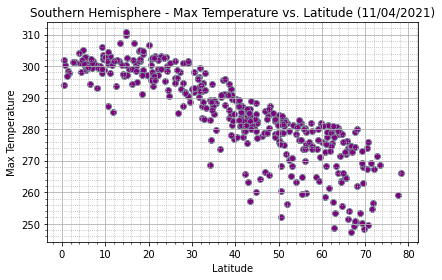

The r-square is -0.8543422436329998.


In [115]:
#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Latitude"], southern["Max Temperature"])

#plot the data 
plt.scatter(southern["Latitude"], southern["Max Temperature"], marker="o", facecolors ="purple", edgecolor = "slategrey")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude (11/04/2021)")
plt.minorticks_on()
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle=":")
plt.tight_layout()

#Save figure
plt.savefig("../data_images/Southern_MaxTemp_Lat.png")

#Show figure
plt.show()

#Detemine R value
print(f"The r-square is {rvalue}.")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

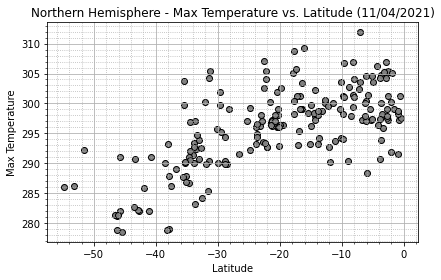

The r-square is 0.6660546846756169.


In [116]:
#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Latitude"], northern["Max Temperature"])

#plot the data 
plt.scatter(northern["Latitude"], northern["Max Temperature"], marker="o",facecolors ="grey", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude (11/04/2021)")
plt.minorticks_on()
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle=":")
plt.tight_layout()

#Save figure
plt.savefig("../data_images/Northern_MaxTemp_Lat.png")

#Show figure
plt.show()

#Detemine R value
print(f"The r-square is {rvalue}.")

## Humidity and Latitude
* In Southern Hemisphere has a small positive relationship as r-value = 0.29
* In Northern Hemisphere has no relationship as r-value = 0.05

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

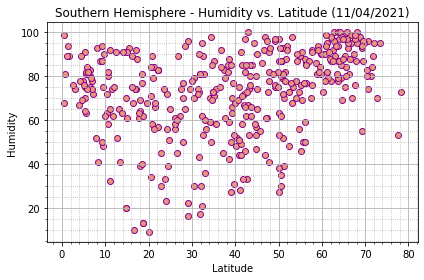

The r-square is 0.2953672532362608.


In [117]:
#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Latitude"], southern["Humidity"])

#plot the data 
plt.scatter(southern["Latitude"], southern["Humidity"], marker="o", facecolors ="darksalmon", edgecolor = "darkmagenta")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude (11/04/2021)")
plt.minorticks_on()
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle=":")
plt.tight_layout()

#Save figure
plt.savefig("../data_images/Southern_Humidity_Lat.png")

#Show figure
plt.show()

#Detemine R value
print(f"The r-square is {rvalue}.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

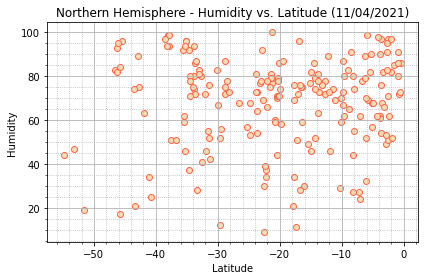

The r-square is 0.06266763365922445.


In [118]:
#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Latitude"], northern["Humidity"])

#plot the data 
plt.scatter(northern["Latitude"], northern["Humidity"], marker="o",facecolors ="wheat", edgecolor = "tomato")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude (11/04/2021)")
plt.minorticks_on()
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle=":")
plt.tight_layout()

#Save figure
plt.savefig("../data_images/Northern_Humidity_Lat.png")

#Show figure
plt.show()

#Detemine R value
print(f"The r-square is {rvalue}.")

## Cloudiness and Latitude
* In Southern Hemisphere has a small positive relationship as r-value = 0.18
* In Northern Hemisphere has a small positive relationship as r-value = 0.24

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

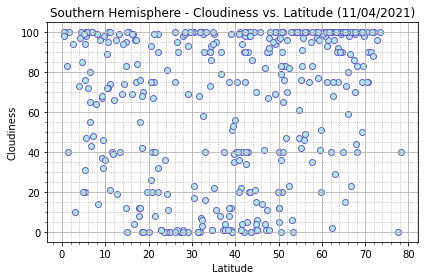

The r-square is 0.17728420869917624.


In [119]:
#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Latitude"], southern["Cloudiness"])

#plot the data 
plt.scatter(southern["Latitude"], southern["Cloudiness"], marker="o", facecolors ="paleturquoise", edgecolor = "slateblue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude (11/04/2021)")
plt.minorticks_on()
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle=":")
plt.tight_layout()

#Save figure
plt.savefig("../data_images/Southern_Cloudiness_Lat.png")

#Show figure
plt.show()

#Detemine R value
print(f"The r-square is {rvalue}.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

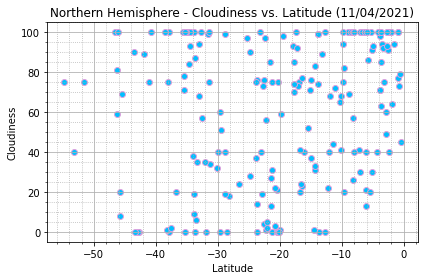

The r-square is 0.1834683204044638.


In [120]:
#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Latitude"], northern["Cloudiness"])

#plot the data 
plt.scatter(northern["Latitude"], northern["Cloudiness"], marker="o",facecolors ="deepskyblue", edgecolor = "plum")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude (11/04/2021)")
plt.minorticks_on()
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle=":")
plt.tight_layout()

#Save figure
plt.savefig("../data_images/Northern_Cloudiness_Lat.png")

#Show figure
plt.show()

#Detemine R value
print(f"The r-square is {rvalue}.")

## Wind Speed and Latitude
* In Southern Hemisphere has a small positive relationship as r-value = 0.18
* In Northern Hemisphere has a small negative relationship as r-value = -0.19

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

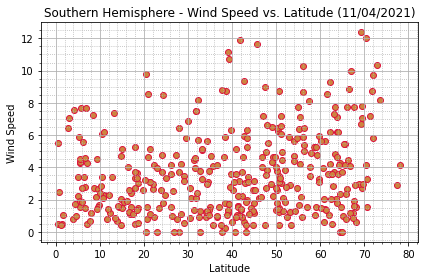

The r-square is 0.21454366460641378.


In [121]:
#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern["Latitude"], southern["Wind Speed"])

#plot the data 
plt.scatter(southern["Latitude"], southern["Wind Speed"], marker="o", facecolors ="peru", edgecolor = "crimson")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude (11/04/2021)")
plt.minorticks_on()
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle=":")
plt.tight_layout()

#Save figure
plt.savefig("../data_images/Southern_WindSpeed_Lat.png")

#Show figure
plt.show()

#Detemine R value
print(f"The r-square is {rvalue}.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

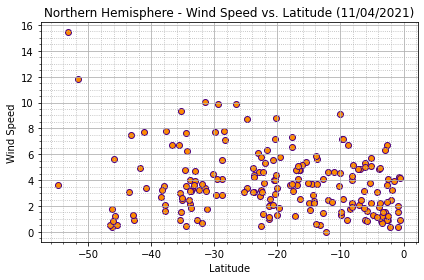

The r-square is -0.20732266092938892.


In [122]:
#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern["Latitude"], northern["Wind Speed"])

#plot the data 
plt.scatter(northern["Latitude"], northern["Wind Speed"], marker="o",facecolors ="darkorange", edgecolor = "indigo")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude (11/04/2021)")
plt.minorticks_on()
plt.grid(which="major", linestyle="-")
plt.grid(which="minor", linestyle=":")
plt.tight_layout()

#Save figure
plt.savefig("../data_images/Northern_WindSpeed_Lat.png")

#Show figure
plt.show()

#Detemine R value
print(f"The r-square is {rvalue}.")